In [1]:
import pandas as pd
import numpy as np
from scipy.spatial import distance
from scipy import linalg
import os
from sklearn.utils import resample
from scipy import stats
import matplotlib.pyplot as plt
import pickle
import random

In [2]:
import gzip

def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

df = getDF('metadata.json.gz')

KeyboardInterrupt: 

In [3]:
df = df[['asin','categories']]

In [4]:
df=df.dropna(subset=['categories'])

In [5]:
len(df)

9354832

In [6]:
df.head()

,asin,categories
0,0001048791,[[Books]]
1,0000143561,"[[Movies & TV, Movies]]"
2,0000037214,"[[Clothing, Shoes & Jewelry, Girls], [Clothing..."
3,0000032069,"[[Sports & Outdoors, Other Sports, Dance, Clot..."
4,0000031909,"[[Sports & Outdoors, Other Sports, Dance]]"


In [7]:
df = df.rename(columns={'asin':'Product_Id'})

In [8]:
df.head()

,Product_Id,categories
0,0001048791,[[Books]]
1,0000143561,"[[Movies & TV, Movies]]"
2,0000037214,"[[Clothing, Shoes & Jewelry, Girls], [Clothing..."
3,0000032069,"[[Sports & Outdoors, Other Sports, Dance, Clot..."
4,0000031909,"[[Sports & Outdoors, Other Sports, Dance]]"


In [9]:
un_male = pd.read_csv('un_male_lsr.csv',sep='|')

In [10]:
un_female = pd.read_csv('un_female_lsr.csv',sep='|')

In [11]:
un_male.columns

Index(['Upvotes', 'Downvotes', 'Rating', 'Product_Id', 'Timestamp', 'gender',
       'Grade_level', 'length', 'Sentiment'],
      dtype='object')

In [12]:
un_female.columns

Index(['Upvotes', 'Downvotes', 'Rating', 'Product_Id', 'Timestamp', 'gender',
       'Grade_level', 'length', 'Sentiment'],
      dtype='object')

In [14]:
un_male = pd.merge(un_male,df,on='Product_Id')

In [15]:
un_female = pd.merge(un_female,df,on='Product_Id')

In [16]:
un_male.head()

,Upvotes,Downvotes,Rating,Product_Id,Timestamp,gender,Grade_level,length,Sentiment,categories
0,0.0,0.0,5.0,B005FYPK9C,1.357603e+09,0,9.0,53.0,0.8674,"[[Clothing, Shoes & Jewelry, Shoes & Accessori..."
1,1.0,0.0,3.0,B005FYPK9C,1.359677e+09,0,42.0,113.0,0.9155,"[[Clothing, Shoes & Jewelry, Shoes & Accessori..."
2,0.0,0.0,4.0,B00474A3DY,1.353110e+09,0,4.0,53.0,0.8316,"[[Pet Supplies, Fish & Aquatic Pets, Aquarium ..."
3,1.0,0.0,2.0,B00474A3DY,1.350000e+09,0,9.0,176.0,0.2074,"[[Pet Supplies, Fish & Aquatic Pets, Aquarium ..."
4,0.0,0.0,2.0,B00474A3DY,1.359072e+09,0,5.0,49.0,0.9022,"[[Pet Supplies, Fish & Aquatic Pets, Aquarium ..."


In [17]:
un_female.head()

,Upvotes,Downvotes,Rating,Product_Id,Timestamp,gender,Grade_level,length,Sentiment,categories
0,0.0,0.0,5.0,B006K6WPCO,1.404086e+09,1,15.0,2.0,0.4404,"[[Home & Kitchen, Bedding, Comforters & Sets, ..."
1,0.0,1.0,4.0,B006K6WPCO,1.365725e+09,1,4.0,24.0,0.6597,"[[Home & Kitchen, Bedding, Comforters & Sets, ..."
2,0.0,0.0,2.0,B006K6WPCO,1.398038e+09,1,4.0,68.0,0.9571,"[[Home & Kitchen, Bedding, Comforters & Sets, ..."
3,1.0,1.0,1.0,B006K6WPCO,1.367539e+09,1,6.0,165.0,0.9241,"[[Home & Kitchen, Bedding, Comforters & Sets, ..."
4,0.0,0.0,5.0,B006K6WPCO,1.395101e+09,1,8.0,21.0,0.8020,"[[Home & Kitchen, Bedding, Comforters & Sets, ..."


In [19]:
un_male.to_csv('undisclosed_male.csv',sep='|',index=False)

In [20]:
un_female.to_csv('undisclosed_female.csv',sep='|',index=False)

In [3]:
dis_male = pd.read_csv('disclosed_male.csv',sep='|')

In [4]:
dis_female = pd.read_csv('disclosed_female.csv',sep='|')

In [51]:
un_male.head()

,Upvotes,Downvotes,Rating,Timestamp,Review_length,Grade_level,overall_sentiment,categories
0,0.0,0.0,5.0,1.357603e+09,53.0,9.0,0.8674,"[[Clothing, Shoes & Jewelry, Shoes & Accessori..."
1,1.0,0.0,3.0,1.359677e+09,113.0,42.0,0.9155,"[[Clothing, Shoes & Jewelry, Shoes & Accessori..."
2,0.0,0.0,4.0,1.353110e+09,53.0,4.0,0.8316,"[[Pet Supplies, Fish & Aquatic Pets, Aquarium ..."
3,1.0,0.0,2.0,1.350000e+09,176.0,9.0,0.2074,"[[Pet Supplies, Fish & Aquatic Pets, Aquarium ..."
4,0.0,0.0,2.0,1.359072e+09,49.0,5.0,0.9022,"[[Pet Supplies, Fish & Aquatic Pets, Aquarium ..."


In [52]:
un_female.head()

,Upvotes,Downvotes,Rating,Timestamp,Review_length,Grade_level,overall_sentiment,categories
0,0.0,0.0,5.0,1.404086e+09,2.0,15.0,0.4404,"[[Home & Kitchen, Bedding, Comforters & Sets, ..."
1,0.0,1.0,4.0,1.365725e+09,24.0,4.0,0.6597,"[[Home & Kitchen, Bedding, Comforters & Sets, ..."
2,0.0,0.0,2.0,1.398038e+09,68.0,4.0,0.9571,"[[Home & Kitchen, Bedding, Comforters & Sets, ..."
3,1.0,1.0,1.0,1.367539e+09,165.0,6.0,0.9241,"[[Home & Kitchen, Bedding, Comforters & Sets, ..."
4,0.0,0.0,5.0,1.395101e+09,21.0,8.0,0.8020,"[[Home & Kitchen, Bedding, Comforters & Sets, ..."


In [53]:
dis_female.head()

,Upvotes,Downvotes,Rating,Timestamp,Review_length,Grade_level,overall_sentiment,categories
0,4,3,1.0,1.337386e+09,323.0,8.0,0.3071,"[['Movies & TV', 'TV']]"
1,0,0,5.0,1.342915e+09,34.0,6.0,0.9052,"[['Movies & TV', 'TV']]"
2,6,2,5.0,1.070496e+09,153.0,15.0,0.8176,"[['Movies & TV', 'TV']]"
3,0,0,5.0,1.366157e+09,22.0,5.0,0.8271,"[['CDs & Vinyl', 'Alternative Rock'], ['CDs & ..."
4,1,0,5.0,1.199664e+09,34.0,3.0,0.8225,"[['CDs & Vinyl', 'Alternative Rock'], ['CDs & ..."


In [5]:
undis_female = pd.read_csv('undisclosed_female.csv',sep='|')

In [6]:
undis_male = pd.read_csv('undisclosed_male.csv',sep='|')

In [76]:
undis_male = undis_male.drop(columns=['Product_Id','gender'])

In [77]:
undis_male.columns

Index(['Upvotes', 'Downvotes', 'Rating', 'Timestamp', 'Grade_level', 'length',
       'Sentiment', 'categories'],
      dtype='object')

In [78]:
undis_male = undis_male.rename(columns={'length':'Review_length','Sentiment':'overall_sentiment'})

In [79]:
undis_male = undis_male[['Upvotes','Downvotes','Rating','Timestamp','Review_length','Grade_level', \
                            'overall_sentiment','categories']]

In [82]:
undis_female.to_csv('undisclosed_female.csv',sep='|',index=False)

In [86]:
len(undis_female)

11929259

In [87]:
len(undis_male)

14000866

In [7]:
undis_female.head()

,Upvotes,Downvotes,Rating,Timestamp,Review_length,Grade_level,overall_sentiment,categories
0,0.0,0.0,5.0,1.404086e+09,2.0,15.0,0.4404,"[['Home & Kitchen', 'Bedding', 'Comforters & S..."
1,0.0,1.0,4.0,1.365725e+09,24.0,4.0,0.6597,"[['Home & Kitchen', 'Bedding', 'Comforters & S..."
2,0.0,0.0,2.0,1.398038e+09,68.0,4.0,0.9571,"[['Home & Kitchen', 'Bedding', 'Comforters & S..."
3,1.0,1.0,1.0,1.367539e+09,165.0,6.0,0.9241,"[['Home & Kitchen', 'Bedding', 'Comforters & S..."
4,0.0,0.0,5.0,1.395101e+09,21.0,8.0,0.8020,"[['Home & Kitchen', 'Bedding', 'Comforters & S..."


In [8]:
dis_female.head()

,Upvotes,Downvotes,Rating,Timestamp,Review_length,Grade_level,overall_sentiment,categories
0,4,3,1.0,1.337386e+09,323.0,8.0,0.3071,"[['Movies & TV', 'TV']]"
1,0,0,5.0,1.342915e+09,34.0,6.0,0.9052,"[['Movies & TV', 'TV']]"
2,6,2,5.0,1.070496e+09,153.0,15.0,0.8176,"[['Movies & TV', 'TV']]"
3,0,0,5.0,1.366157e+09,22.0,5.0,0.8271,"[['CDs & Vinyl', 'Alternative Rock'], ['CDs & ..."
4,1,0,5.0,1.199664e+09,34.0,3.0,0.8225,"[['CDs & Vinyl', 'Alternative Rock'], ['CDs & ..."


# Natural experiment category-wise

In [9]:
def filterCategory(x,category):
    if category in x:
        return True
    return False

In [10]:
import numpy as np
from scipy.spatial import distance
from scipy import linalg

In [11]:
def calculateCdist(df_1_s,df_2,cov_inv):
    cnt = df_2.shape[0]
    slice_len = 250000
    obtained_pairs = []
    n = df_1_s.shape[0]
    if cnt>slice_len:
    
        slice_cnt = int(cnt/slice_len)+1
        for i in range(slice_cnt):
            u_s = i*slice_len
            
            if i < slice_cnt-1:
                u_e = u_s + slice_len
                df_2_s = df_2[u_s:u_e]
            else:
                df_2_s = df_2[u_s:]

            Y = distance.cdist(df_1_s[['Rating','Timestamp','Review_length','Grade_level','overall_sentiment']], \
                               df_2_s[['Rating','Timestamp','Review_length','Grade_level','overall_sentiment']], \
                               'mahalanobis', VI=cov_inv)
            Y_1 = Y.argmin(axis=1)


            min_y = [(Y_1[j],Y[j,Y_1[j]],i) for j in range(n)]
            obtained_pairs.append(min_y)

        # obtaining the matched set
        matched_set = []
        for i in range(n):
            for ind,val,s in sorted(list(zip(*obtained_pairs))[i],key=lambda x:x[1]):
                pos = s*slice_len+ind
                matched_set.append(pos)
                break
        
        return matched_set
    
    else:
        Y = distance.cdist(df_1_s[['Rating','Timestamp','Review_length','Grade_level','overall_sentiment']], \
                           df_2[['Rating','Timestamp','Review_length','Grade_level','overall_sentiment']], \
                           'mahalanobis', VI=cov_inv)
        Y_1 = Y.argmin(axis=1)
    
        return Y_1

In [12]:
def findMatchingRandom(samp_0,samp_1,n):
    
    print(samp_0.shape[0],samp_1.shape[0])
    pop_size = samp_0.shape[0]+samp_1.shape[0]
    if pop_size<1000000:
        m = pop_size
    else:
        m = 1000000
    
    all_sample = pd.concat([samp_0,samp_1])
    print (all_sample.shape[0])
    cov = np.cov(all_sample[['Rating','Timestamp','Review_length','Grade_level','overall_sentiment']] \
                 .sample(m).values, rowvar=False)
    cov_inv = linalg.inv(cov)
    
    print('covariance matrix obtained')
    
    sample_n = all_sample.sample(n)
    
    sample_n_0 = sample_n[sample_n['group']==0]
    sample_n_1 = sample_n[sample_n['group']==1]
    
    print (sample_n_0.shape[0],sample_n_1.shape[0])
    
    Y_1 = calculateCdist(sample_n_0,samp_1,cov_inv)
    print(len(Y_1))
    
    pair_0_0 = [sample_n_0.iloc[i] for i in range(sample_n_0.shape[0])]
    pair_1_0 = [samp_1.iloc[i] for i in Y_1]
            
    Y_1 = calculateCdist(sample_n_1,samp_0,cov_inv)
    print(len(Y_1))
    
    pair_0_1 = [samp_0.iloc[i] for i in Y_1]
    pair_1_1 = [sample_n_1.iloc[i] for i in range(sample_n_1.shape[0])]
    
    #samp_0 = samp_0.drop(columns='group')
    #samp_1 = samp_1.drop(columns='group')
    if len(pair_0_0)+len(pair_1_1)==10000:
        print('no missing pairs...')
    
    return list(zip(pair_0_0,pair_1_0)),list(zip(pair_1_1,pair_0_1))        

In [32]:
categories = ['Books','Electronics','CDs & Vinyl','Clothing, Shoes & Jewelry','Home & Kitchen',\
             'Kindle Store','Sports & Outdoors','Cell Phones & Accessories', 'Toys & Games','Games','Literature & Fiction',\
             'Beauty','Health & Personal Care','Movies','Computers']

In [13]:
categories = ['Movies','Computers']

In [16]:
# creating separate directories for different categories
import os  
for category in categories:
    try:
        os.mkdir('categories_random/'+category)
    except:
        print('except')
        pass

In [4]:
import pickle

In [150]:
dis_male.head()

,Upvotes,Downvotes,Rating,Timestamp,Review_length,Grade_level,overall_sentiment,categories
0,0,0,4.0,1.359763e+09,23.0,7.0,0.9201,"[['Movies & TV', 'TV']]"
1,0,0,4.0,1.384992e+09,25.0,7.0,0.0000,"[['Movies & TV', 'TV']]"
2,0,0,5.0,1.392682e+09,176.0,8.0,0.9674,"[['Movies & TV', 'TV']]"
3,1,0,5.0,1.365725e+09,174.0,13.0,0.8020,"[['Movies & TV', 'TV']]"
4,45,0,4.0,1.044490e+09,414.0,7.0,0.9815,"[['Movies & TV', 'TV']]"


In [151]:
dis_female.head()

,Upvotes,Downvotes,Rating,Timestamp,Review_length,Grade_level,overall_sentiment,categories
0,4,3,1.0,1.337386e+09,323.0,8.0,0.3071,"[['Movies & TV', 'TV']]"
1,0,0,5.0,1.342915e+09,34.0,6.0,0.9052,"[['Movies & TV', 'TV']]"
2,6,2,5.0,1.070496e+09,153.0,15.0,0.8176,"[['Movies & TV', 'TV']]"
3,0,0,5.0,1.366157e+09,22.0,5.0,0.8271,"[['CDs & Vinyl', 'Alternative Rock'], ['CDs & ..."
4,1,0,5.0,1.199664e+09,34.0,3.0,0.8225,"[['CDs & Vinyl', 'Alternative Rock'], ['CDs & ..."


In [152]:
undis_female.head()

,Upvotes,Downvotes,Rating,Timestamp,Review_length,Grade_level,overall_sentiment,categories
0,0.0,0.0,5.0,1.404086e+09,2.0,15.0,0.4404,"[['Home & Kitchen', 'Bedding', 'Comforters & S..."
1,0.0,1.0,4.0,1.365725e+09,24.0,4.0,0.6597,"[['Home & Kitchen', 'Bedding', 'Comforters & S..."
2,0.0,0.0,2.0,1.398038e+09,68.0,4.0,0.9571,"[['Home & Kitchen', 'Bedding', 'Comforters & S..."
3,1.0,1.0,1.0,1.367539e+09,165.0,6.0,0.9241,"[['Home & Kitchen', 'Bedding', 'Comforters & S..."
4,0.0,0.0,5.0,1.395101e+09,21.0,8.0,0.8020,"[['Home & Kitchen', 'Bedding', 'Comforters & S..."


In [153]:
undis_male.head()

,Upvotes,Downvotes,Rating,Timestamp,Review_length,Grade_level,overall_sentiment,categories
0,0.0,0.0,5.0,1.357603e+09,53.0,9.0,0.8674,"[['Clothing, Shoes & Jewelry', 'Shoes & Access..."
1,1.0,0.0,3.0,1.359677e+09,113.0,42.0,0.9155,"[['Clothing, Shoes & Jewelry', 'Shoes & Access..."
2,0.0,0.0,4.0,1.353110e+09,53.0,4.0,0.8316,"[['Pet Supplies', 'Fish & Aquatic Pets', 'Aqua..."
3,1.0,0.0,2.0,1.350000e+09,176.0,9.0,0.2074,"[['Pet Supplies', 'Fish & Aquatic Pets', 'Aqua..."
4,0.0,0.0,2.0,1.359072e+09,49.0,5.0,0.9022,"[['Pet Supplies', 'Fish & Aquatic Pets', 'Aqua..."


In [17]:
for category in categories:
    print(category)
    
    # filter data by category
    dis_male_c = dis_male[dis_male['categories'].apply(lambda x:filterCategory(x,category))]
    dis_female_c = dis_female[dis_female['categories'].apply(lambda x:filterCategory(x,category))]
    undis_male_c = undis_male[undis_male['categories'].apply(lambda x:filterCategory(x,category))]
    undis_female_c = undis_female[undis_female['categories'].apply(lambda x:filterCategory(x,category))]
    
    # find the matchings....
    print(dis_male_c.shape[0],dis_female_c.shape[0],undis_male_c.shape[0],undis_female_c.shape[0])
    
    n=10000
    
    print('Calculating the matchings...')
    undis_female_c.insert(8,'group',0)
    undis_male_c.insert(8,'group',1)
    matches_uf_um,matches_um_uf = findMatchingRandom(undis_female_c,undis_male_c,n)
    undis_female_c = undis_female_c.drop(columns='group')
    undis_male_c = undis_male_c.drop(columns='group')
    print('finished 1')
    
    dis_female_c.insert(8,'group',0)
    dis_male_c.insert(8,'group',1)
    matches_df_dm,matches_dm_df = findMatchingRandom(dis_female_c,dis_male_c,n)
    dis_female_c = dis_female_c.drop(columns='group')
    dis_male_c = dis_male_c.drop(columns='group')
    print('finished 2')
    
    undis_female_c.insert(8,'group',0)
    dis_female_c.insert(8,'group',1)
    matches_uf_df,matches_df_uf = findMatchingRandom(undis_female_c,dis_female_c,n)
    undis_female_c = undis_female_c.drop(columns='group')
    dis_female_c = dis_female_c.drop(columns='group')
    print('finished 3')
    
    undis_male_c.insert(8,'group',0)
    dis_male_c.insert(8,'group',1)
    matches_um_dm,matches_dm_um = findMatchingRandom(undis_male_c,dis_male_c,n)
    undis_male_c = undis_male_c.drop(columns='group')
    dis_male_c = dis_male_c.drop(columns='group')
    
    
    print ('matchings obtained')
    

    # storing the matchings as pickle files....
    
    with open('categories_random/'+category+'/undis_female_undis_male.pickle','wb') as ft:
        pickle.dump(matches_uf_um,ft)
    with open('categories_random/'+category+'/undis_male_undis_female.pickle','wb') as ft:
        pickle.dump(matches_um_uf,ft)    
        
    with open('categories_random/'+category+'/dis_female_dis_male.pickle','wb') as ft:
        pickle.dump(matches_df_dm,ft)
    with open('categories_random/'+category+'/dis_male_dis_female.pickle','wb') as ft:
        pickle.dump(matches_dm_df,ft)    
        
    with open('categories_random/'+category+'/undis_female_dis_female.pickle','wb') as ft:
        pickle.dump(matches_uf_df,ft)
    with open('categories_random/'+category+'/dis_female_undis_female.pickle','wb') as ft:
        pickle.dump(matches_df_uf,ft)       
        
    with open('categories_random/'+category+'/undis_male_dis_male.pickle','wb') as ft:
        pickle.dump(matches_um_dm,ft)
    with open('categories_random/'+category+'/dis_male_undis_male.pickle','wb') as ft:
        pickle.dump(matches_dm_um,ft)    
        
        

Movies
1334672 930252 1014561 441555
Calculating the matchings...
441555 1014561
1456116
covariance matrix obtained
3038 6962
3038
6962
no missing pairs...
finished 1
930252 1334672
2264924
covariance matrix obtained
4021 5979
4021
5979
no missing pairs...
finished 2
441555 930252
1371807
covariance matrix obtained
3284 6716
3284
6716
no missing pairs...
finished 3
1014561 1334672
2349233
covariance matrix obtained
4289 5711
4289
5711
no missing pairs...
matchings obtained
Computers
1202590 558198 1161440 247312
Calculating the matchings...
247312 1161440
1408752
covariance matrix obtained
1786 8214
1786
8214
no missing pairs...
finished 1
558198 1202590
1760788
covariance matrix obtained
3204 6796
3204
6796
no missing pairs...
finished 2
247312 558198
805510
covariance matrix obtained
3066 6934
3066
6934
no missing pairs...
finished 3
1161440 1202590
2364030
covariance matrix obtained
4981 5019
4981
5019
no missing pairs...
matchings obtained


In [149]:
matches_df_dm[1]

(Upvotes                                                              0
 Downvotes                                                            0
 Rating                                                               1
 Timestamp                                                  1.39795e+09
 Review_length                                                       26
 Grade_level                                                          1
 overall_sentiment                                              -0.0772
 categories           [['Health & Personal Care', 'Medical Supplies ...
 group                                                                0
 Name: 11887838, dtype: object,
 Upvotes                                                              0
 Downvotes                                                            0
 Rating                                                               1
 Timestamp                                                  1.39899e+09
 Review_length                  

In [18]:
def getStatsBootstrap(matchings):
    match_g1_g2,match_g2_g1 = matchings
    
    all_matches = match_g1_g2 + [(j,i) for i,j in match_g2_g1]

    p_1,p_2 = bootstrapSampling(all_matches)
    
    u_p_1 = []
    h_p_1 = []
    u_p_2 = []
    h_p_2 = []
   
    for u,d in p_1:
        u_p_1.append(u)
        h_p_1.append(u-d)
    
    for u,d in p_2:
        u_p_2.append(u)
        h_p_2.append(u-d)
        
    return np.mean(h_p_1),stats.sem(h_p_1),np.mean(h_p_2),stats.sem(h_p_2)
        

In [19]:
def bootstrapSampling(lst):
    votes_1 = []
    votes_2 = []
    
    resampled_lst = resample(lst,random_state=1)
    for x,y in resampled_lst:
        votes_1.append((x.Upvotes,x.Downvotes))
        votes_2.append((y.Upvotes,y.Downvotes))
        
    return votes_1,votes_2    

In [100]:
def perIncr(x,y):
    return (x-y)/min([x,y])*100

In [130]:
def bootstrapSamplingStdEr(matchings):
    
    match_g1_g2,match_g2_g1 = matchings
    
    lst = match_g1_g2 + [(j,i) for i,j in match_g2_g1]
    
    h_s = [(x.Upvotes - x.Downvotes,y.Upvotes - y.Downvotes) for x,y in lst]
    
    est = []
    
    for i in range(1000):
        resampled = resample(h_s)
        h_s_x = np.mean([x[0] for x in resampled])
        h_s_y = np.mean([x[1] for x in resampled])
        
        est.append(perIncr(h_s_x,h_s_y))
        
    return np.mean(est),stats.sem(est)
        

In [257]:
per_incr = []
std_err = []

for category in categories:

    print (category)
    
    with open('categories_random_1/'+category+'/undis_female_undis_male.pickle','rb') as ft:
        matches_uf_um = pickle.load(ft)
    with open('categories_random_1/'+category+'/undis_male_undis_female.pickle','rb') as ft:
        matches_um_uf = pickle.load(ft)
    #m_1,s_1,m_2,s_2 = getStatsBootstrap((matches_uf_um,matches_um_uf))
    m_n,s_r = bootstrapSamplingStdEr((matches_uf_um,matches_um_uf))
    
        
#     with open('categories_random_1/'+category+'/dis_female_dis_male.pickle','rb') as ft:
#         matches_df_dm = pickle.load(ft)
#     with open('categories_random_1/'+category+'/dis_male_dis_female.pickle','rb') as ft:
#         matches_dm_df = pickle.load(ft) 
#     #m_1,s_1,m_2,s_2 = getStatsBootstrap((matches_df_dm,matches_dm_df))
#     m_n,s_r = bootstrapSamplingStdEr((matches_df_dm,matches_dm_df))

#     with open('categories_random_1/'+category+'/undis_female_dis_female.pickle','rb') as ft:
#          matches_uf_df = pickle.load(ft)
#     with open('categories_random_1/'+category+'/dis_female_undis_female.pickle','rb') as ft:
#          matches_df_uf = pickle.load(ft)
#     #m_1,s_1,m_2,s_2 = getStatsBootstrap((matches_uf_df,matches_df_uf))
#     m_n,s_r = bootstrapSamplingStdEr((matches_uf_df,matches_df_uf))    

#     with open('categories_random/'+category+'/undis_male_dis_male.pickle','rb') as ft:
#         matches_um_dm = pickle.load(ft)
#     with open('categories_random/'+category+'/dis_male_undis_male.pickle','rb') as ft:
#         matches_dm_um = pickle.load(ft)
#     #m_1,s_1,m_2,s_2 = getStatsBootstrap((matches_um_dm,matches_dm_um))
#     m_n,s_r = bootstrapSamplingStdEr((matches_um_dm,matches_dm_um))

    per_incr.append((m_2 - m_1)/min([m_1,m_2]) * 100)
    #per_incr.append(m_n)
    std_err.append(s_r)
    
#m_1 = np.mean(m_s_1)
#m_2 = np.mean(m_s_2)
avg = np.mean(per_incr)
per_incr.append(avg)
std_err.append(0.1)
                    
#plotResults(per_incr,'UF','UM')
    #mean_1,mean_2,std_errs_1,std_errs_2 = [],[],[],[]
    
    #all_data = [matches_uf_um,matches_um_uf,matches_df_dm,matches_dm_df,matches_uf_df,matches_df_uf,\
    #            matches_um_dm,matches_dm_um]
    
    

Books
Electronics
CDs & Vinyl
Clothing, Shoes & Jewelry
Home & Kitchen
Kindle Store
Sports & Outdoors
Cell Phones & Accessories
Toys & Games
Games
Literature & Fiction
Beauty
Health & Personal Care
Movies
Computers


In [184]:
std_err

[0.3184091510224339,
 0.5885129449134531,
 0.20175082973359582,
 5.657024723167452,
 0.3139671509338372,
 0.3283086397909166,
 0.40185558797186793,
 0.5824653122345935,
 0.3796356800558536,
 0.6600591434310911,
 0.26688446200124255,
 0.4067329943927584,
 0.5302900983112132,
 0.6023487874582542,
 0.6073321961634043,
 0.1]

In [144]:
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import matplotlib.pyplot as plt

In [258]:
def plotResults(per_incr,std_err,grp_1,grp_2):
    #plt.rcdefaults()
    fig, ax = plt.subplots()

    y_pos = np.arange(len(cat_plot))
    
    hatch,color,fill = [],[],[]
    for i in per_incr:
        if i<0:
            hatch.append('xxx')
            color.append('r')
            fill.append(False)
        else:
            hatch.append('xxx')
            color.append('b')
            fill.append(False)

    print(len(y_pos),len(per_incr))        
    barlist = ax.barh(y_pos, per_incr, align='center',xerr=std_err)
    for i,thisbar in enumerate(barlist.patches):
        thisbar.set_hatch(hatch[i])
        thisbar.set_color(color[i])
        thisbar.set_fill(fill[i])
    
    majorLocator = MultipleLocator(20)
    majorFormatter = FormatStrFormatter('%d')
    minorLocator = MultipleLocator(2.5)

    ax.xaxis.set_major_locator(majorLocator)
    ax.xaxis.set_major_formatter(majorFormatter)

    # for the minor ticks, use no labels; default NullFormatter
    ax.xaxis.set_minor_locator(minorLocator)

    
    ax.set_yticks(y_pos)
    plt.ylim(-1,16)
    ax.set_yticklabels(cat_plot)
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel('Advantage (%)')
    plt.xlim(-75,75)
    #plt.xlim(-40,40)
    x_pos = np.arange(-75,90,step=15)
    #x_pos = np.arange(-40,40,step=10)
    ax.set_xticks(x_pos)
    #ax.set_xticklabels([40,30,20,10,0,10,20,30,40])
    ax.set_xticklabels([75,60,45,30,15,0,15,30,45,60,75])
    plt.axvline(0, color='black')
    plt.axhline(14.58, color='black')
    plt.text(-65, 0, grp_1, fontsize=23)
    plt.text(60, 0, grp_2, fontsize=23)
    plt.grid(linestyle='--')
    ax.get_yticklabels()[15].set_color("m")
    title = grp_1+'_'+grp_2+'.jpg'
    plt.tight_layout()
    plt.savefig('plotsNatural/'+title,dpi=250)
    #plt.savefig('plotNatural/'+title, format='svg', dpi=1200)
    plt.show()

In [24]:
import matplotlib as mpl

In [20]:
cat_plot = ('Books','Electronics','CDs','Clothing','Home',\
             'Kindle','Sports','CellPhone', 'Toys','Games', \
              'Literature','Beauty','Health','Movies','Computers','Overall')

16 16


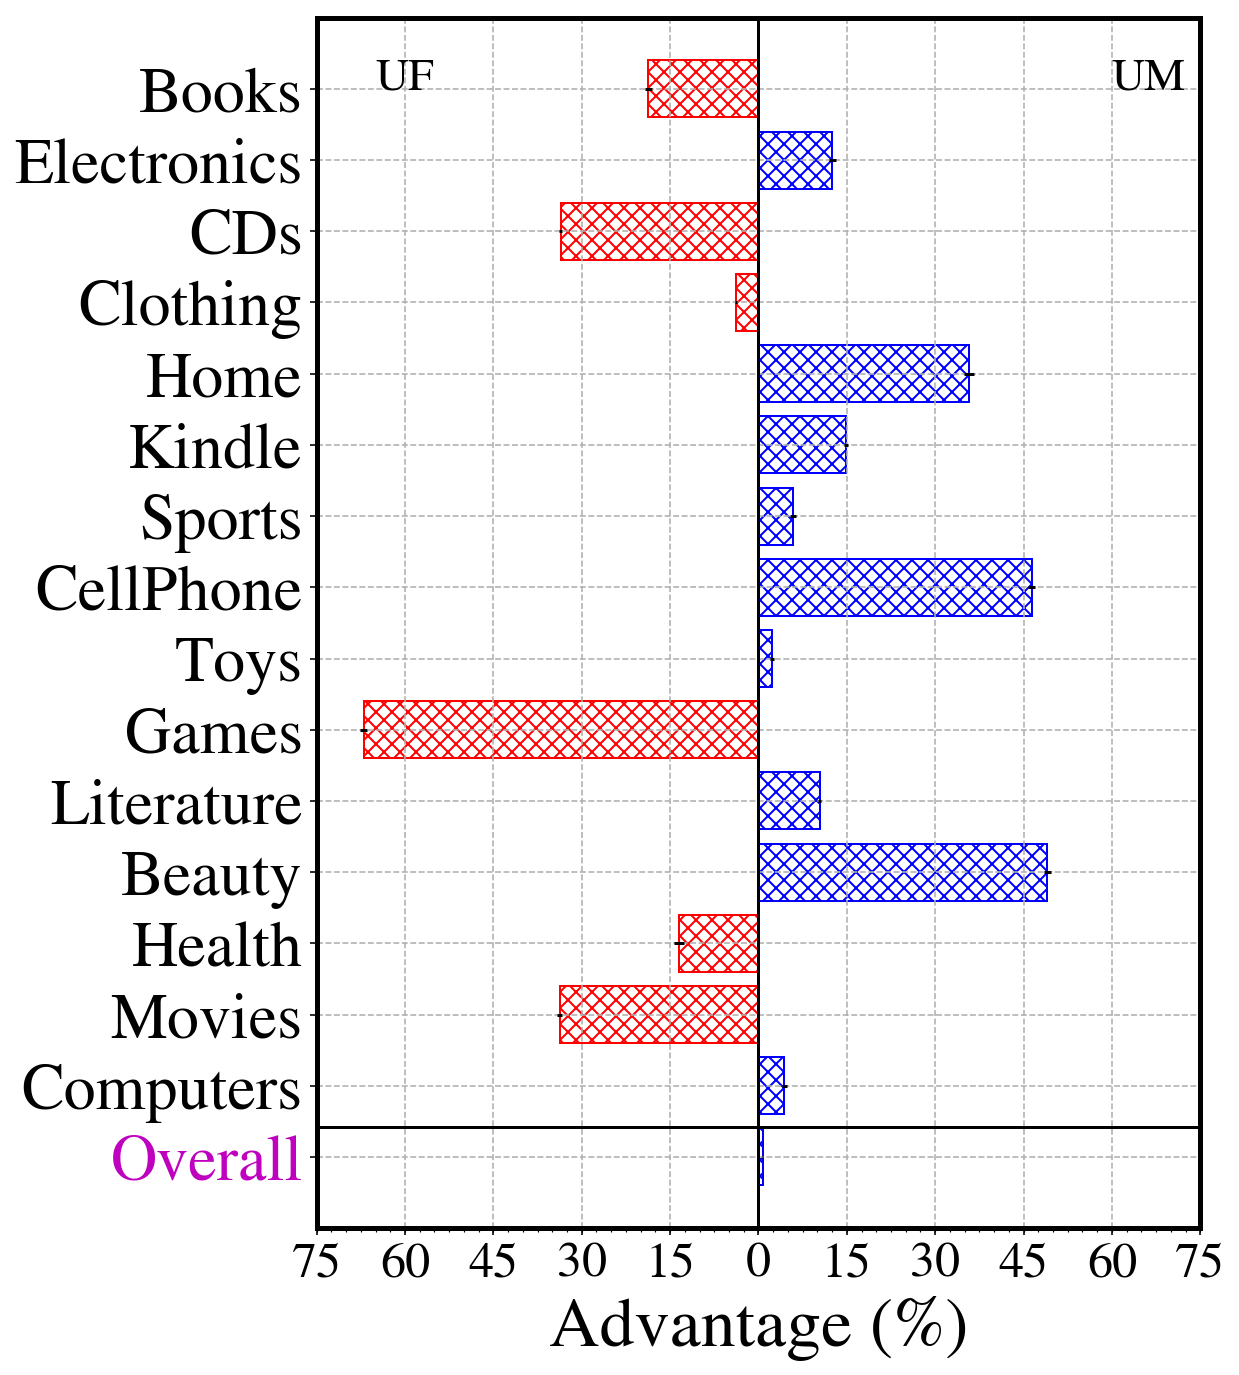

In [259]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
#mpl.style.use('classic')
mpl.rcParams['xtick.labelsize'] = 25
mpl.rcParams['ytick.labelsize'] = 32
mpl.rcParams['font.size'] = 20
mpl.rcParams['figure.figsize'] =  9,10
mpl.rcParams['axes.labelsize'] = 35
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['axes.linewidth'] = 2.5
plotResults(per_incr,std_err,'UF','UM')

ind = np.arange(5)    
width = 0.35 

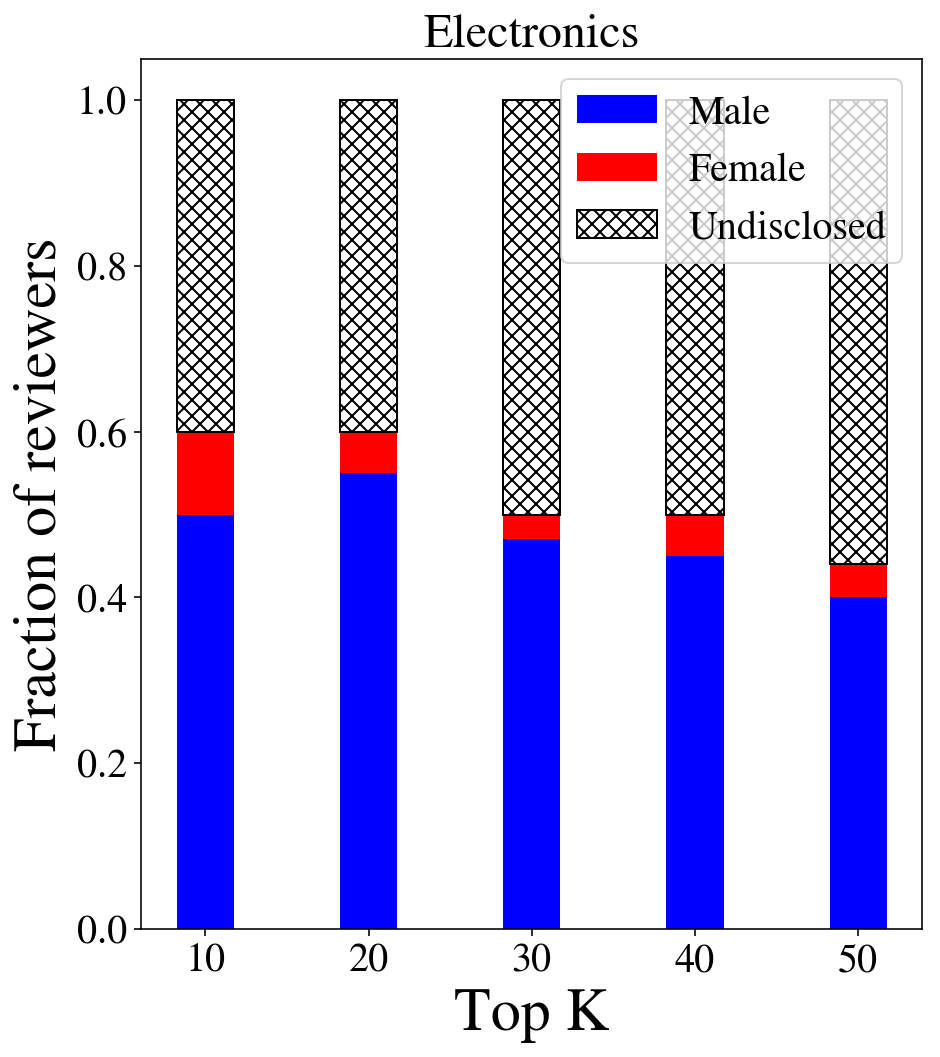

In [65]:
p1 = plt.bar(ind, st_1, width, color = 'b')
p2 = plt.bar(ind, st_2, width, color = 'r',bottom=st_1)
p3 = plt.bar(ind, st_3, width, color = 'g',bottom=np.array(st_1)+np.array(st_2),hatch='xxx',fill=False)

mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['font.size'] = 20
mpl.rcParams['figure.figsize'] =  7,8
mpl.rcParams['axes.labelsize'] = 25
mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'


plt.ylabel('Fraction of reviewers')
plt.xlabel('Top K')
plt.xticks(ind, (10, 20, 30, 40, 50))
plt.title('Electronics')
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0], p3[0]), ('Male', 'Female','Undisclosed'))
plt.savefig('plotsTopk/electronics.jpg',dpi=800)
plt.show()

In [80]:
def plotFunction(st_1,st_2,st_3,title,legend):
    ind = np.arange(5)    
    width = 0.35
    
    p1 = plt.bar(ind, st_1, width, color = 'b')
    p2 = plt.bar(ind, st_2, width, color = 'r',bottom=st_1)
    p3 = plt.bar(ind, st_3, width, color = 'g',bottom=np.array(st_1)+np.array(st_2),hatch='xxx',fill=False)

    mpl.rcParams['xtick.labelsize'] = 20
    mpl.rcParams['ytick.labelsize'] = 20
    mpl.rcParams['font.size'] = 20
    mpl.rcParams['figure.figsize'] =  7,8
    mpl.rcParams['axes.labelsize'] = 25
    mpl.rcParams['mathtext.fontset'] = 'stix'
    mpl.rcParams['font.family'] = 'STIXGeneral'


    plt.ylabel('Fraction of reviewers')
    plt.xlabel('Top K')
    plt.xticks(ind, (10, 20, 30, 40, 50))
    #plt.title(title)
    #plt.yticks(np.arange(0, 81, 10))
    if legend==True:
        plt.legend((p1[0], p2[0], p3[0]), ('Male', 'Female','Undisclosed'))
    plt.savefig('plotsTopk/'+title+'.jpg',dpi=800)
    plt.show()

In [81]:
st_1 = [0.5,0.55,0.47,0.45,0.4]
st_2 = [0.1,0.05,0.03,0.05,0.04]
st_3 = [0.4,0.4,0.5,0.5,0.56]

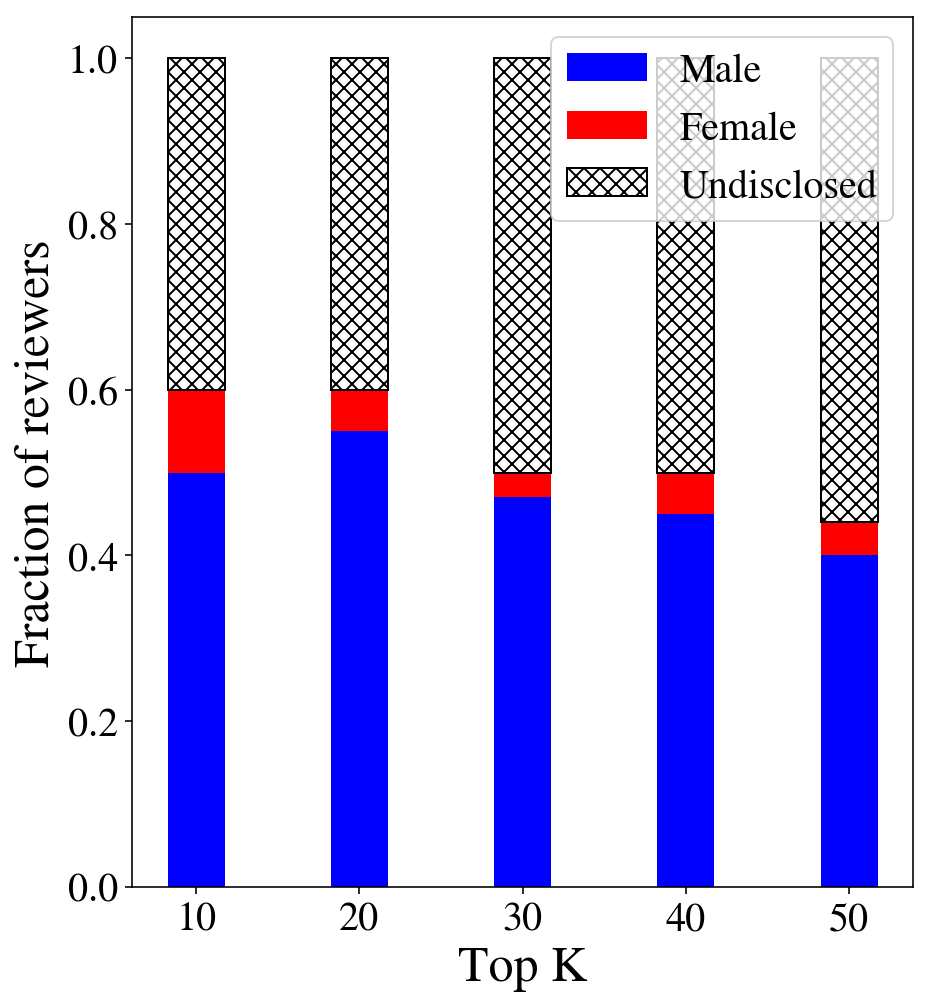

In [82]:
plotFunction(st_1,st_2,st_3,'electronics',True)

In [76]:
st_1 = [0.1,0.15,0.23,0.17,0.16]
st_2 = [0,0,0.03,0.03,0.06]
st_3 = [0.9,0.85,0.73,0.8,0.78]

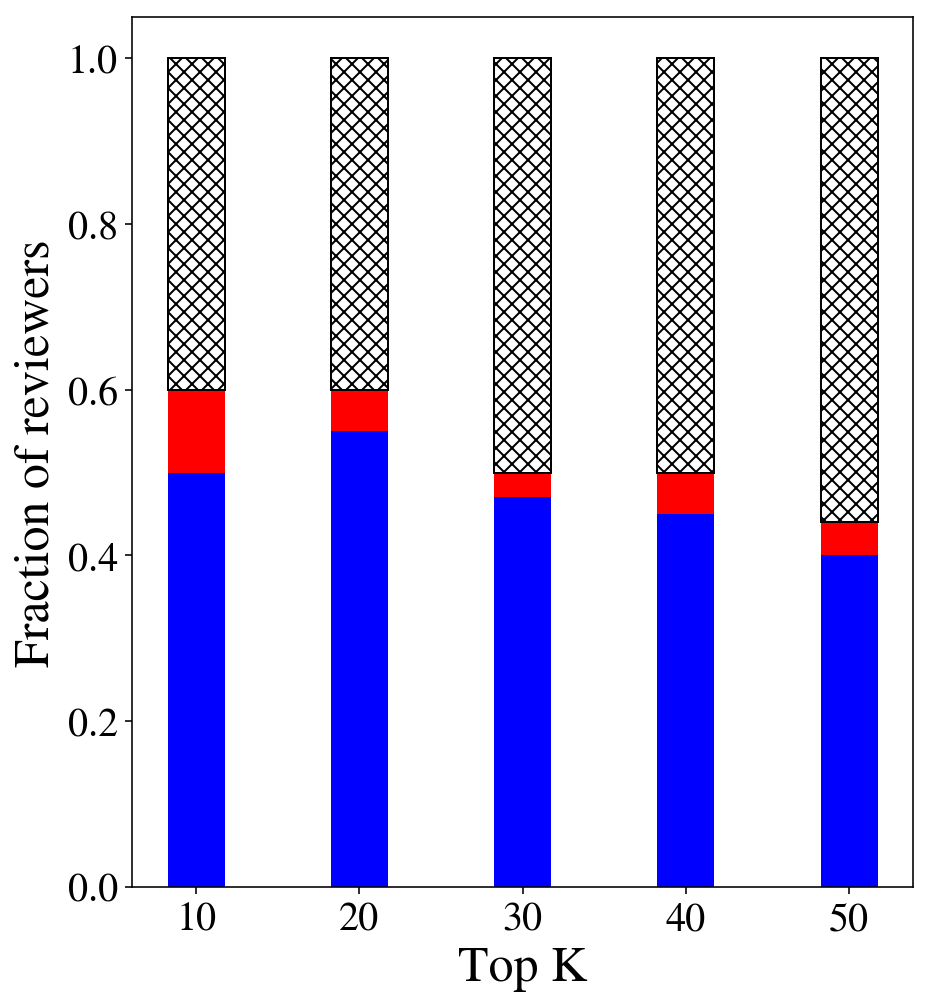

In [83]:
plotFunction(st_1,st_2,st_3,'games',False)

In [84]:
st_1 = [0.4,0.35,0.3,0.23,0.2]
st_2 = [0.2,0.15,0.1,0.09,0.12]
st_3 = [0.4,0.5,0.6,0.68,0.68]

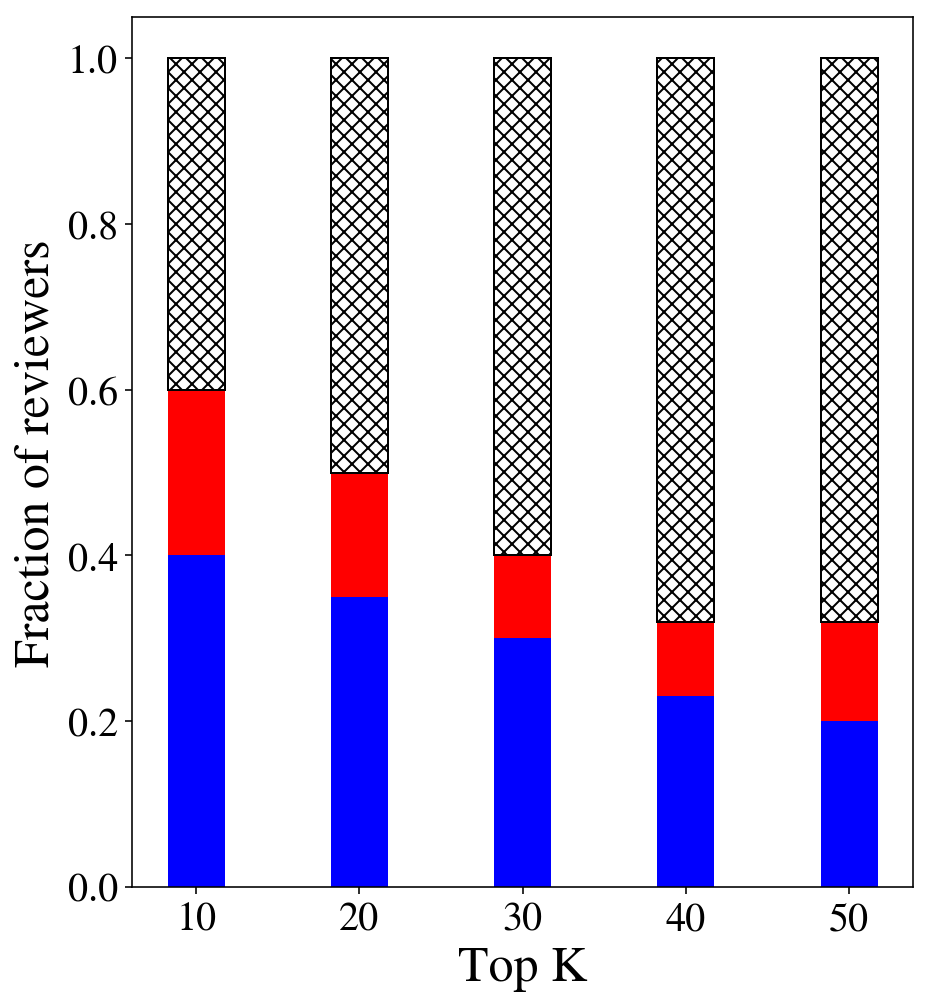

In [85]:
plotFunction(st_1,st_2,st_3,'literature',False)

In [86]:
def plot2stack(st_1,st_2,title,legend):
    ind = np.arange(5)    
    width = 0.35
    
    p1 = plt.bar(ind, st_1, width, color = 'b')
    p2 = plt.bar(ind, st_2, width, color = 'r',bottom=st_1)

    mpl.rcParams['xtick.labelsize'] = 20
    mpl.rcParams['ytick.labelsize'] = 20
    mpl.rcParams['font.size'] = 20
    mpl.rcParams['figure.figsize'] =  7,8
    mpl.rcParams['axes.labelsize'] = 25
    mpl.rcParams['mathtext.fontset'] = 'stix'
    mpl.rcParams['font.family'] = 'STIXGeneral'


    plt.ylabel('Fraction of reviewers')
    plt.xlabel('Top K')
    plt.xticks(ind, (10, 20, 30, 40, 50))
    #plt.title(title)
    #plt.yticks(np.arange(0, 81, 10))
    if legend==True:
        plt.legend((p1[0], p2[0]), ('Male', 'Female'))
    plt.savefig('plotsTopk/'+title+'.jpg',dpi=800)
    plt.show()
    

In [87]:
st_1 = [0.5,0.75,0.86,0.85,0.9]
st_2 = [0.5,0.25,0.14,0.15,0.1]

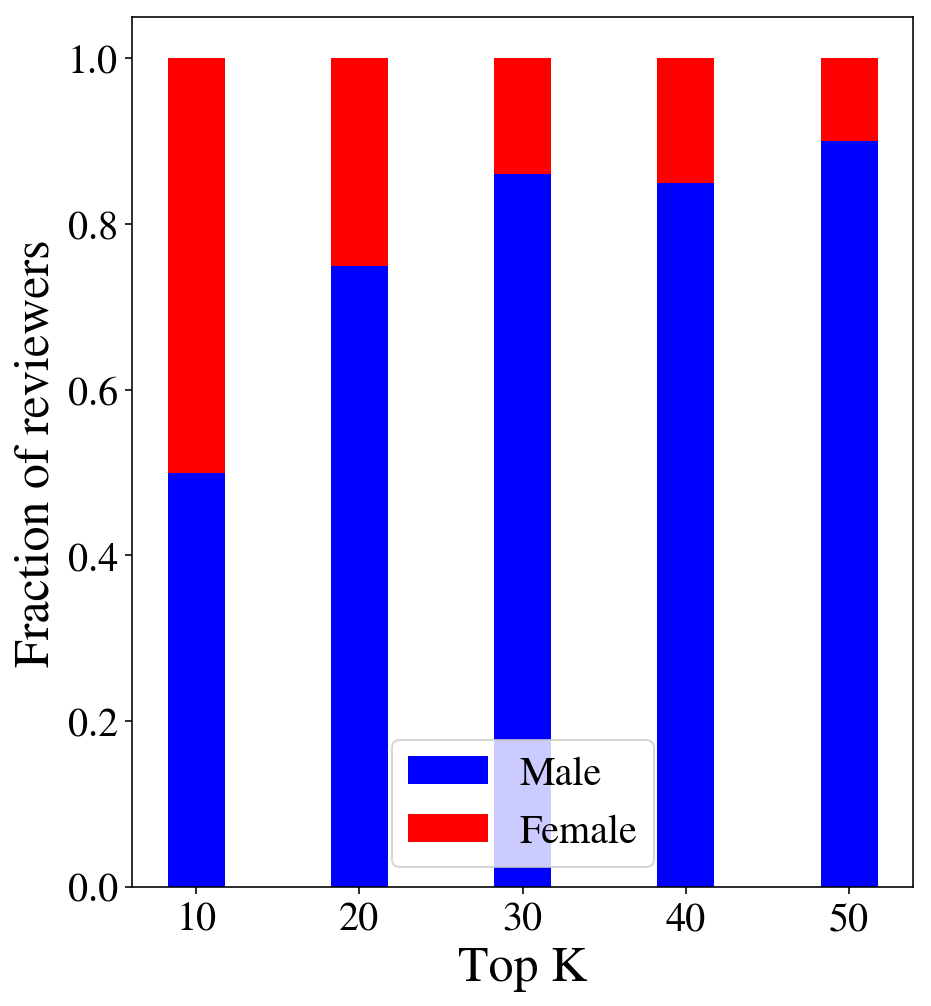

In [88]:
plot2stack(st_1,st_2,'electronics_un',True)

In [89]:
st_1 = [0.45,0.47,0.41,0.43,0.39]
st_2 = [0.55,0.53,0.59,0.57,0.61]

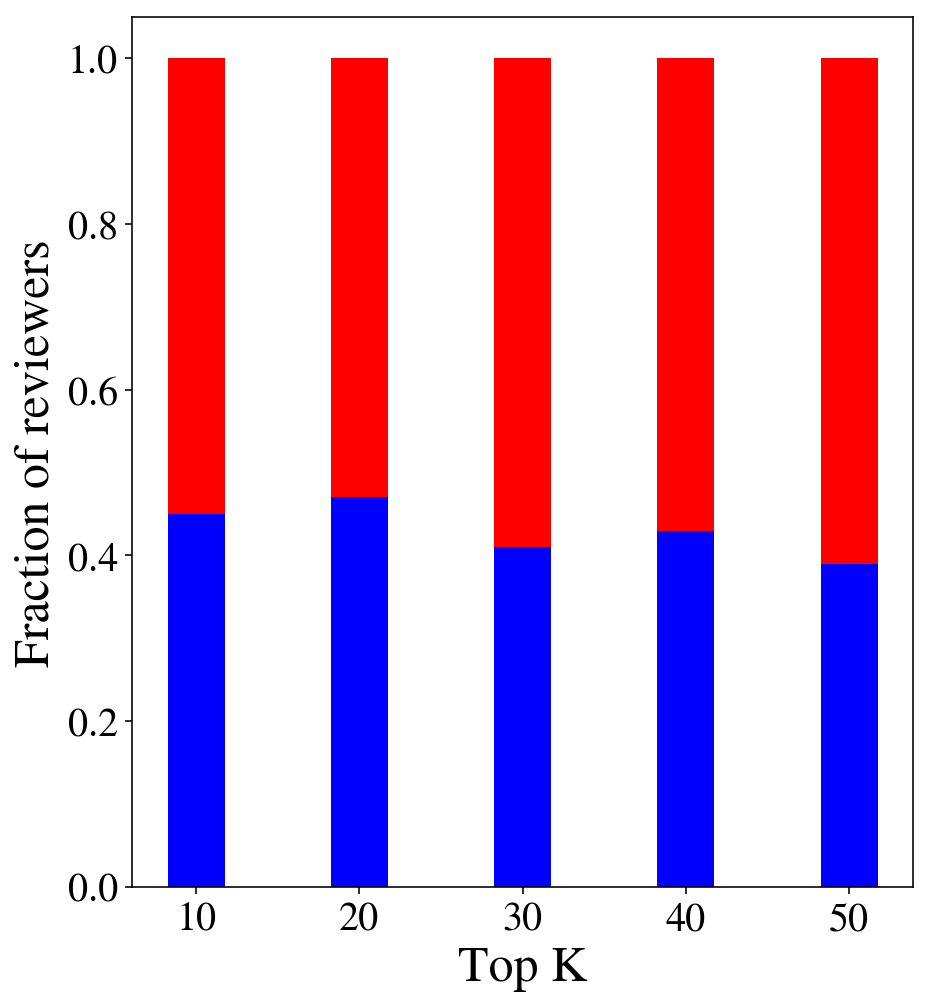

In [90]:
plot2stack(st_1,st_2,'games_un',False)

In [91]:
st_1 = [0,0.5,0.55,0.4,0.39]
st_2 = [1.0,0.5,0.45,0.6,0.61]

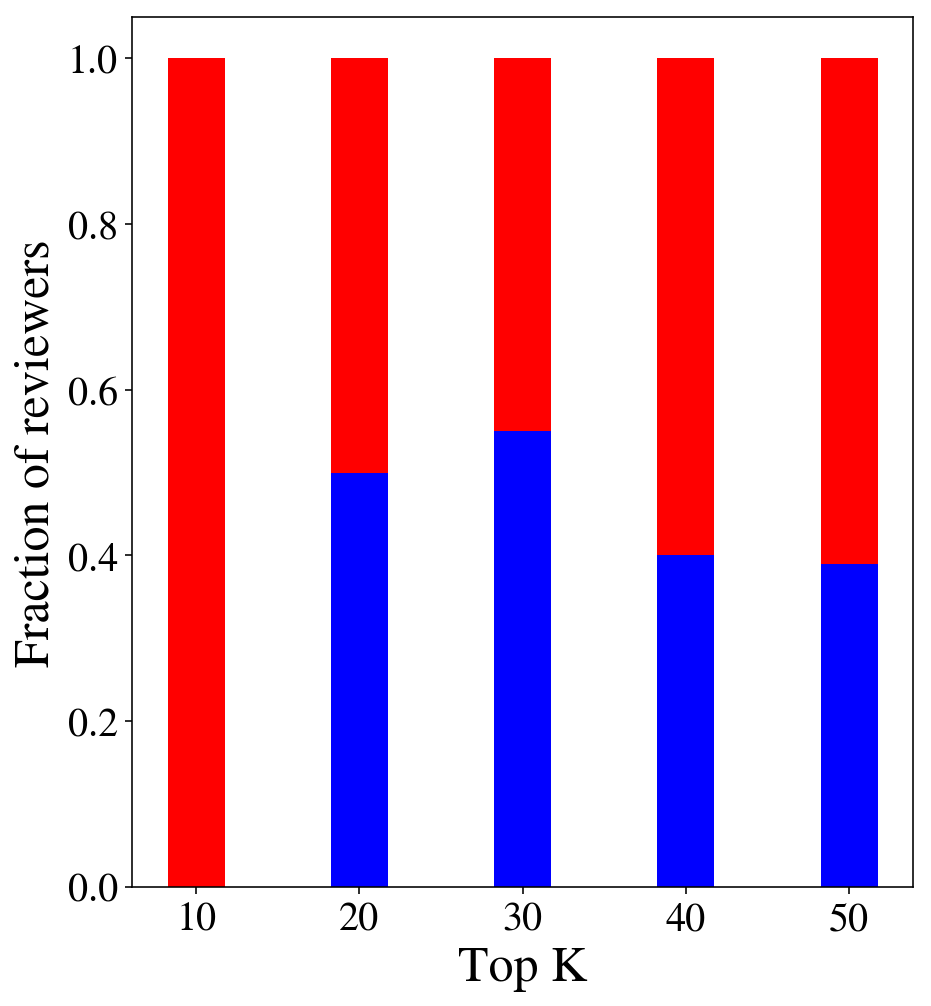

In [92]:
plot2stack(st_1,st_2,'literature_un',False)